### Packages loading

In [17]:
import sys
sys.path.insert(0, '..')
import numpy as np
import random
import qiskit
import qtm.evolution
import qtm.state
import qtm.qcompilation
import qtm.ansatz
import qtm.constant
from qtm.evolution import environment, mutate, selection, crossover, utils
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
num_qubits = 2
beta = 1

compiler = qtm.qcompilation.QuantumCompilation(
    u=qtm.ansatz.g2gnw(4, 2),
    vdagger=qtm.state.construct_tfd_state(num_qubits,beta = 1).inverse(),
    optimizer='adam',
    loss_func='loss_fubini_study'
)
compiler.fit(num_steps=1, verbose=1)

AttributeError: module 'qtm' has no attribute 'qcompilation'

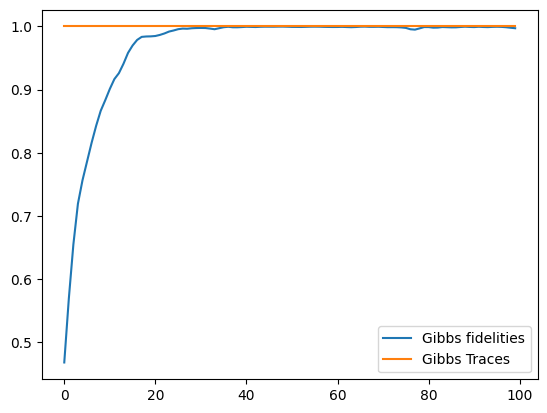

In [8]:
plt.plot(compiler.gibbs_fidelities, label='Gibbs fidelities')
plt.plot([np.real(x) for x in compiler.gibbs_traces], label='Gibbs Traces')
plt.legend()

In [11]:
 compiler.gibbs_traces

[(1.0000000000000007+7.228068926733337e-17j),
 (1.0000000000000024+6.203141823169864e-17j),
 (0.9999999999999999-2.2743287989767504e-17j),
 (0.9999999999999993-2.34525051742028e-17j),
 (0.9999999999999998+1.7963110383097256e-17j),
 (0.9999999999999982-9.017643807740821e-17j),
 (0.9999999999999993-6.534526972910404e-17j),
 (0.9999999999999994-7.263009492336596e-17j),
 (1.0000000000000009+1.549336915074435e-17j),
 (0.9999999999999991-4.6262493169943976e-17j),
 (0.9999999999999992+1.9192995276184172e-16j),
 (0.9999999999999998-7.408426968054123e-17j),
 (1+9.962341225523789e-17j),
 (1-9.59860263167244e-17j),
 (0.999999999999999+7.027502974056413e-17j),
 (1+4.885773624098811e-18j),
 (0.9999999999999997+1.0176749111772181e-16j),
 (0.9999999999999992+3.2748220800767715e-17j),
 (1.0000000000000022+1.4552589021367429e-16j),
 (1+9.14372304610459e-17j),
 (1.0000000000000009+8.405849688183423e-17j),
 (0.9999999999999996+9.516629422072522e-17j),
 (0.9999999999999999-9.187440845275662e-17j),
 (0.999

In [6]:
params = {'depth': 10,
          'num_individual': 32,  # Must mod 8 = 0
          'num_generation': 30,
          'num_qubits': 3,
          'threshold': lambda loss_value: loss_value < 0.4,
          'prob_mutate': 0.01}

env = environment.EEnvironment(
    params,
    fitness_func = compilation_fitness,
    selection_func = selection.elitist_selection,
    crossover_func= crossover.onepoint_crossover,
    mutate_func=mutate.bitflip_mutate,
    pool = qtm.constant.operations
)

env.initialize_population()
env.evol()
env.plot()

Step:   0%|          | 0/30 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
qc = env.best_candidate.qc
compiler = qtm.qcompilation.QuantumCompilation(
    u=qc,
    vdagger=qc_haar,
    optimizer='adam',
    loss_func='loss_fubini_study'
)
compiler.fit(num_steps=100, verbose=1)

In [ ]:
plt.plot(compiler.loss_values)


In [ ]:
qc.draw('mpl')
